<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a8/%D0%9B%D0%9E%D0%93%D0%9E_%D0%A8%D0%90%D0%94.png" width=500px/>
    <font>Python 2022</font><br/>
    <br/>
    <br/>
    <b style="font-size: 2em">Web, HTTP, API</b><br/>
    <br/>
    <font>Комендантян Андрей</font><br/>
</center>

# Устройство компьютерных сетей

- Обмен данными по сети устроен многоуровнево – от тока в проводах до картинки в браузере
- Для того что бы использовать сеть, как правило, не требуется хорошо разбираться во всех уровнях

## Сетевые модели: OSI vs TCP/IP

1. OSI эталонная модель
2. TCP/IP более практическая

<div><center>
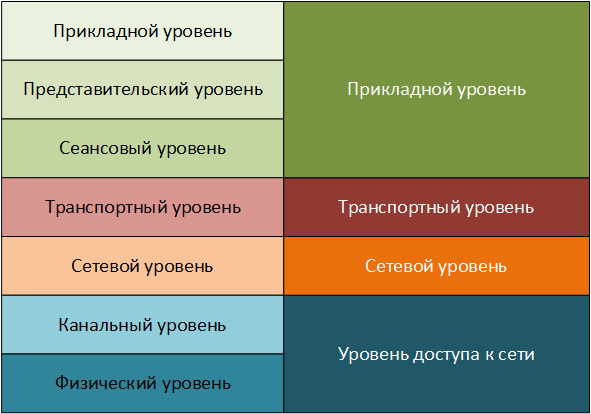
</center></div>

[](https://zametkinapolyah.ru/kompyuternye-seti/stek-protokolov-tcp-ip.html)

## Сеть на низком уровне

Если хочется разобраться, то ["Сети для самых маленьких"](https://linkmeup.gitbook.io/sdsm/) | [[оно же на habr]](https://habr.com/ru/post/134892/)


<div><center>
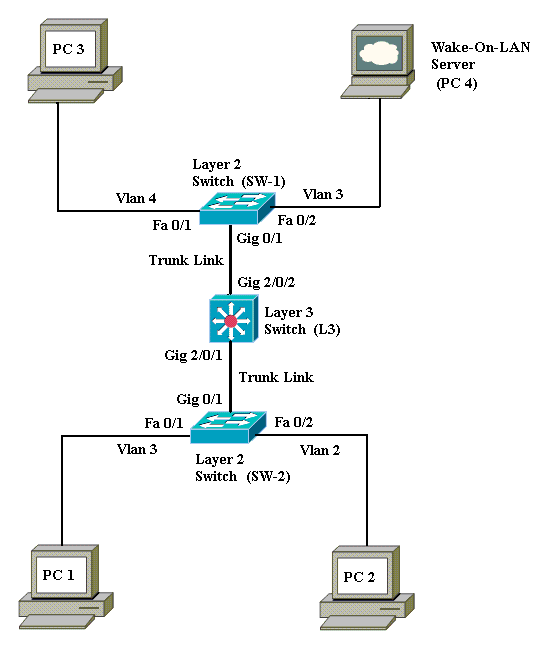
</center></div>

[](https://www.cisco.com/c/dam/en/us/support/docs/switches/catalyst-3750-series-switches/91672-catl3-wol-vlans1.gif)

### Ethernet, IP, TCP и все-все-все

<div><center>

</center></div>

## IPv4 vs IPv6

<div><center>
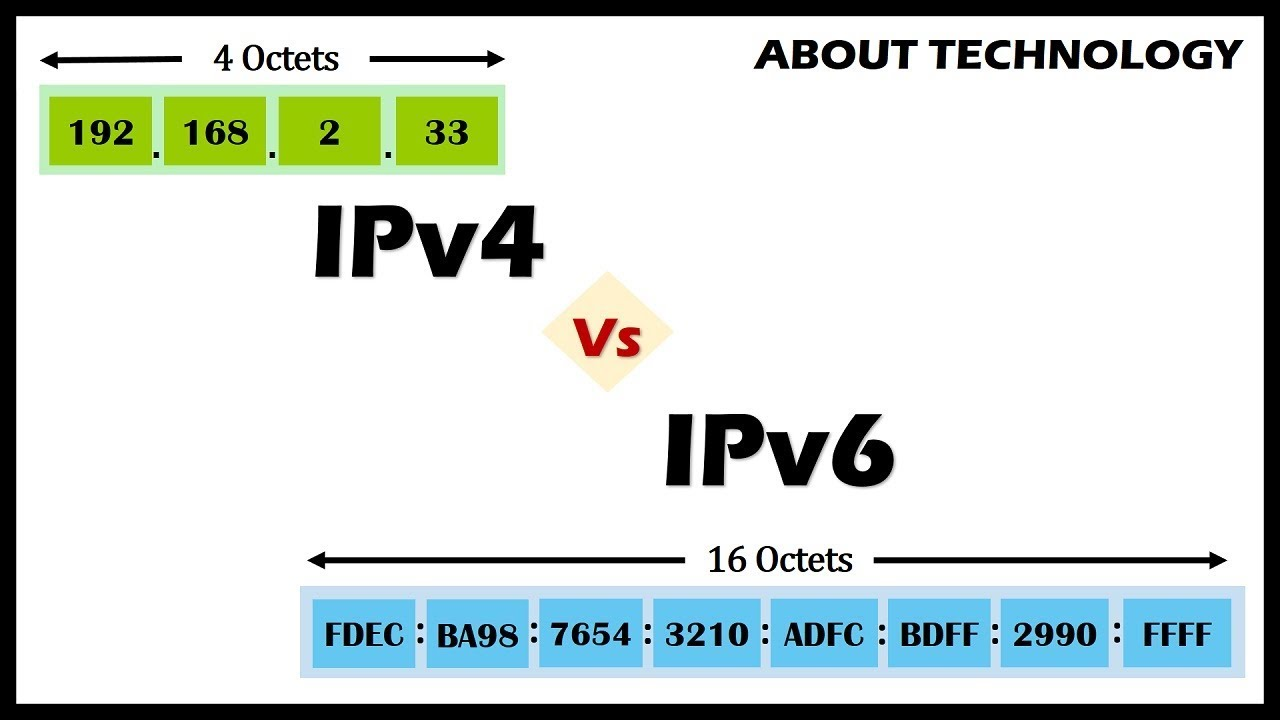
</center></div>

[](https://i.ytimg.com/vi/D1avGPpSJHs/maxresdefault.jpg)

## TCP vs UDP
- UDP просто посылает сообщения и не заботится о надёжности доставки или порядке прихода сообщений
- TCP выполняет "рукопожатие" между клиентами и может гарантировать надёжность доставки и порядок прихода сообщений

<div><center>
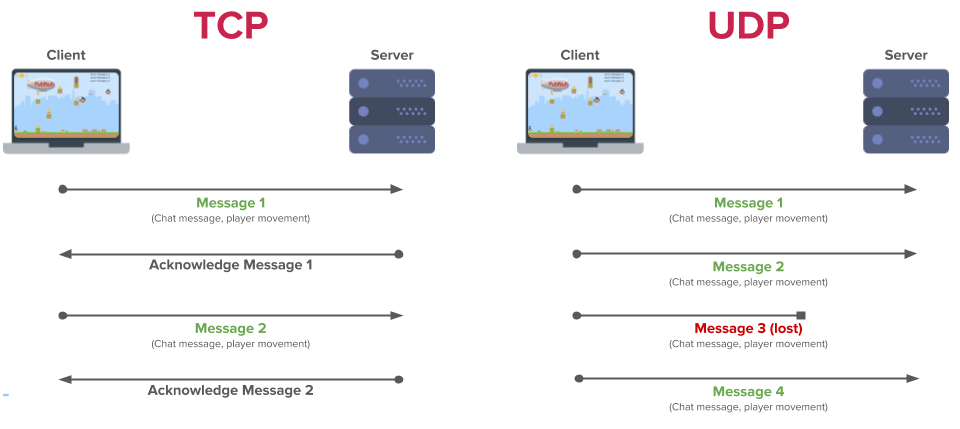
</center></div>

[](https://wiki.merionet.ru/images/tcp-i-udp-v-chem-raznica/1.png)

## Порты
- 16-битное число, позволяющее идентифицировать конкретный процесс на машине с одним и тем же IP-адресом

<div><center>
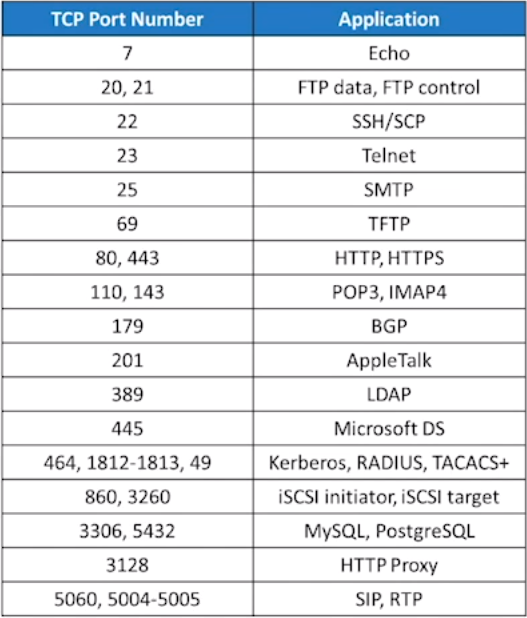
</center></div>

## DNS

<div><center>
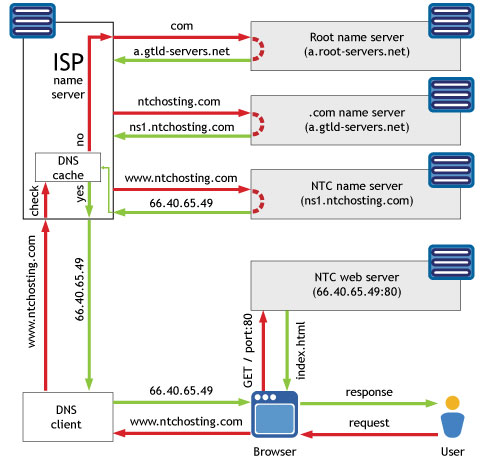
</center></div>

## DNS

In [311]:
import socket

socket.gethostbyname('ya.ru')

'87.250.250.242'

## URL: Uniform Resource Locator


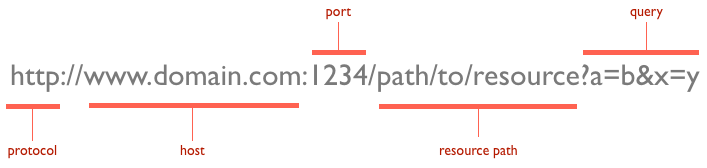

Есть много разных примеров URL:
```
- ftp://ftp.is.co.za/rfc/rfc1808.txt
- http://www.ietf.org/rfc/rfc2396.txt
- ldap://[2001:db8::7]/c=GB?objectClass?one
- mailto:John.Doe@example.com
- tel:+1-816-555-1212
- telnet://192.0.2.16:80/
```

## HTTP: HyperText Transfer Protocol 

- протокол прикладного уровня (поверх TCP) на базе которого работают многие приложения

### HTTP-request

<div><center>
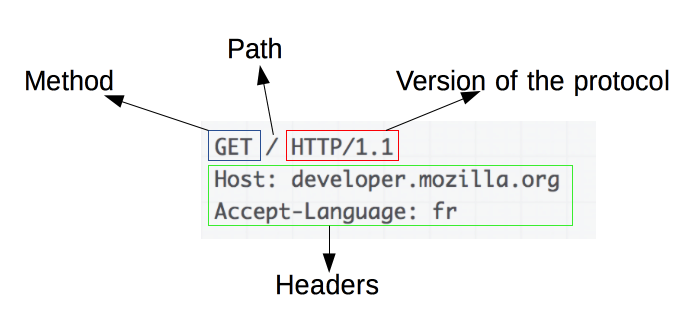
</center></div>

### HTTP methods

<div><center>
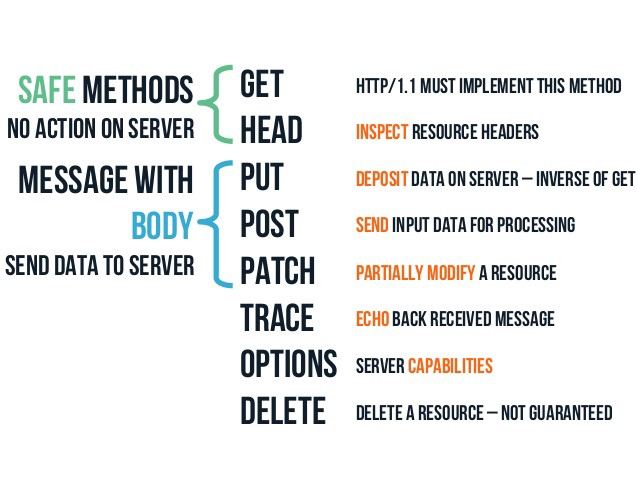
</center></div>

### HTTP Headers

[Mozilla docs: list of HTTP headers](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers)


<div><center>
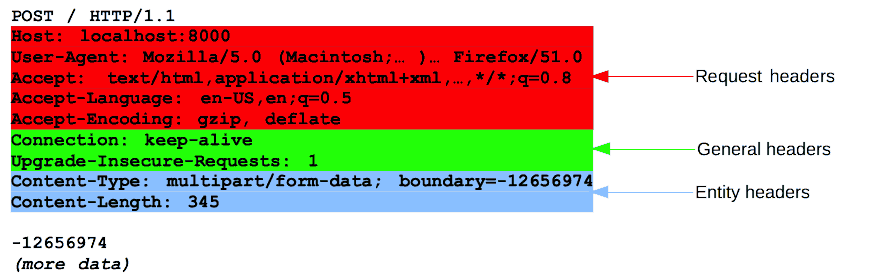
</center></div>

### HTTP-response

<div><center>
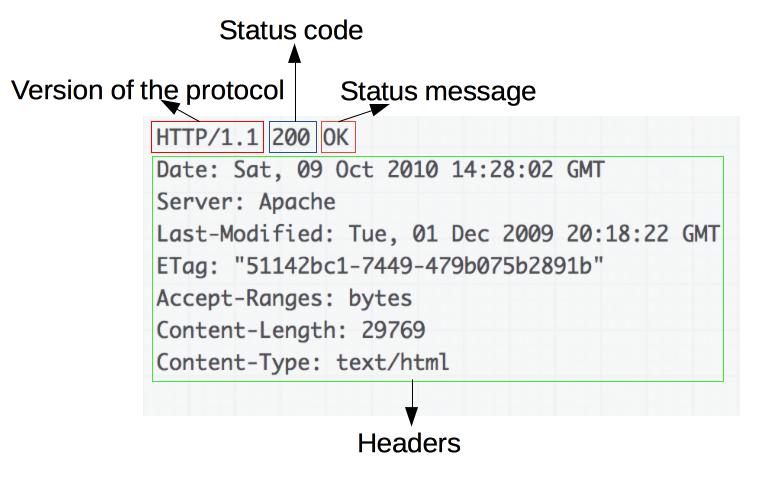
</center></div>

### HTTP-response

[Mozilla docs: list of HTTP statuses](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)

<div><center>
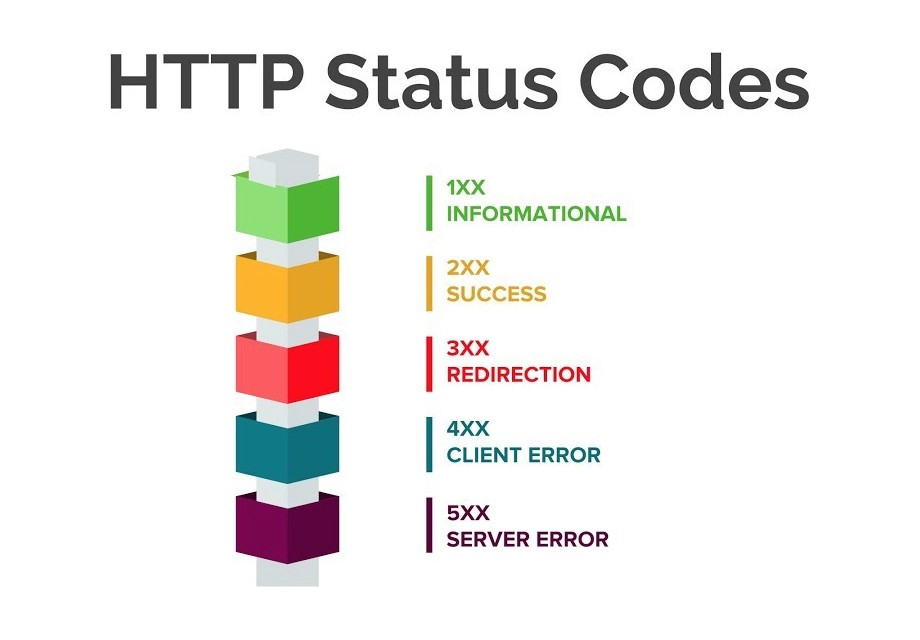
</center></div>

### HTTP response

<div><center>
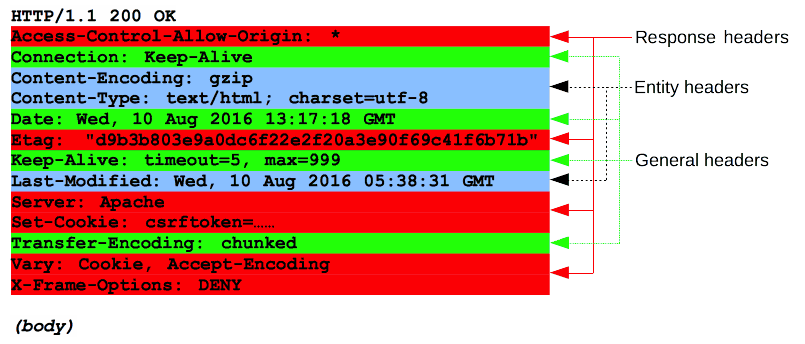
</center></div>

## send via UDP (ipv4)

In [126]:
addr = '127.0.0.1', 6001  # host, port

sock_one = socket.socket(
    socket.AF_INET,  # Address Family INET
    socket.SOCK_DGRAM  # ≈ "use UDP"
)
sock_one.bind(addr)

with socket.socket(socket.AF_INET, socket.SOCK_DGRAM) as sock_two:
    sock_two.sendto(b'Hello,', addr)
    sock_two.sendto(b'world!', addr)

with socket.socket(socket.AF_INET, socket.SOCK_DGRAM) as sock_three:
    sock_three.sendto(b'How', addr)
    sock_three.sendto(b'are', addr)
    sock_three.sendto(b'you?', addr)

for _ in range(5):
    data, addr = sock_one.recvfrom(1024)
    print(data, addr)

sock_one.close()

b'Hello,' ('127.0.0.1', 42715)
b'world!' ('127.0.0.1', 42715)
b'How' ('127.0.0.1', 35298)
b'are' ('127.0.0.1', 35298)
b'you?' ('127.0.0.1', 35298)


## send via UDP (ipv6)

In [315]:
addr = '::1', 6001, 0, 0

sock_one = socket.socket(
    socket.AF_INET6,  # Address Family INET
    socket.SOCK_DGRAM  # ≈ "use UDP"
)
sock_one.bind(addr)

with socket.socket(socket.AF_INET6, socket.SOCK_DGRAM) as sock_two:
    sock_two.sendto(b'Hello,', addr)
    sock_two.sendto(b'world!', addr)
    
with socket.socket(socket.AF_INET6, socket.SOCK_DGRAM) as sock_three:
    sock_three.sendto(b'How', addr)
    sock_three.sendto(b'are', addr)
    sock_three.sendto(b'you?', addr)

for _ in range(5):
    data, addr = sock_one.recvfrom(1024)
    print(data, addr)

sock_one.close()

b'Hello,' ('::1', 55831, 0, 0)
b'world!' ('::1', 55831, 0, 0)
b'How' ('::1', 46791, 0, 0)
b'are' ('::1', 46791, 0, 0)
b'you?' ('::1', 46791, 0, 0)


## send via TCP (ipv4)
(и немного HTTP)

In [ ]:
socket.getaddrinfo('httpbin.org', 80, family=socket.AF_INET, type=socket.SOCK_STREAM)

In [128]:
addr = '54.166.148.227', 80  # httpbin.org

request = b'\r\n'.join([
    b'GET /get HTTP/1.1',  # передаём HTTP запрос поверх TCP
    b'Host: httpbin.org',
]) + b'\r\n\r\n'

with socket.socket(
    family=socket.AF_INET,  # Adress Family INET
    type=socket.SOCK_STREAM  # ≈ "use TCP"
) as sock:
    sock.connect(addr)
    sock.sendall(request)
    response = sock.recv(1024)

In [45]:
response

b'HTTP/1.1 200 OK\r\nDate: Sun, 20 Nov 2022 21:38:08 GMT\r\nContent-Type: application/json\r\nContent-Length: 198\r\nConnection: keep-alive\r\nServer: gunicorn/19.9.0\r\nAccess-Control-Allow-Origin: *\r\nAccess-Control-Allow-Credentials: true\r\n\r\n{\n  "args": {}, \n  "headers": {\n    "Host": "httpbin.org", \n    "X-Amzn-Trace-Id": "Root=1-637a9e3f-746666bf55bd230946333e35"\n  }, \n  "origin": "79.139.132.94", \n  "url": "http://httpbin.org/get"\n}\n'

## send via TCP (ipv6)
(и немного HTTP)

In [ ]:
socket.getaddrinfo('localhost', 8890, family=socket.AF_INET6, type=socket.SOCK_STREAM)

In [287]:
addr = '::1', 8890, 0, 0  # localhost и 8890 порт на котором поднят Jupyter Notebook

request = b'\r\n'.join([
    b'GET / HTTP/1.1',  # передаём HTTP запрос поверх TCP
]) + b'\r\n\r\n'

with socket.socket(
    family=socket.AF_INET6,  # Adress Family INET
    type=socket.SOCK_STREAM  # ≈ "use TCP"
) as sock:
    sock.connect(addr)
    sock.sendall(request)
    response = sock.recv(1024)

In [288]:
response

b'HTTP/1.1 302 Found\r\nServer: TornadoServer/6.2\r\nContent-Type: text/html; charset=UTF-8\r\nDate: Mon, 21 Nov 2022 00:15:52 GMT\r\nLocation: /lab?\r\nContent-Length: 0\r\n\r\n'

## SSL / TLS

### Попытка работы без ssl

In [290]:
request = b'\r\n'.join([
    b'GET /get HTTP/1.1',  # передаём HTTP запрос поверх TCP
    b'Host: httpbin.org',
]) + b'\r\n\r\n'

with socket.create_connection(('httpbin.org', 443), timeout=1) as sock:  # 443 порт HTTPS
    sock.sendall(request)
    response = sock.recv(1024)
    
print(response.decode('utf8'))

HTTP/1.1 400 Bad Request
Server: awselb/2.0
Date: Mon, 21 Nov 2022 00:17:38 GMT
Content-Type: text/html
Content-Length: 220
Connection: close

<html>
<head><title>400 The plain HTTP request was sent to HTTPS port</title></head>
<body>
<center><h1>400 Bad Request</h1></center>
<center>The plain HTTP request was sent to HTTPS port</center>
</body>
</html>



### ... и с ssl

In [293]:
import ssl

context = ssl.create_default_context()

request = b'\r\n'.join([
    b'GET /get HTTP/1.1',  # передаём HTTP запрос поверх TCP
    b'Host: httpbin.org',
]) + b'\r\n\r\n'

with socket.create_connection(('httpbin.org', 443)) as sock:
    with context.wrap_socket(sock, server_hostname='httpbin.org') as ssock:
        ssock.sendall(request)
        response = ssock.recv(1024)
    
print(response.decode('utf8'))

HTTP/1.1 200 OK
Date: Mon, 21 Nov 2022 00:18:53 GMT
Content-Type: application/json
Content-Length: 199
Connection: keep-alive
Server: gunicorn/19.9.0
Access-Control-Allow-Origin: *
Access-Control-Allow-Credentials: true




[Больше о работе с сокетами в питоне](https://docs.python.org/3/howto/sockets.html)

## Requests: HTTP for Humans
- удобная библиотека для работы с HTTP в python

<div><center>
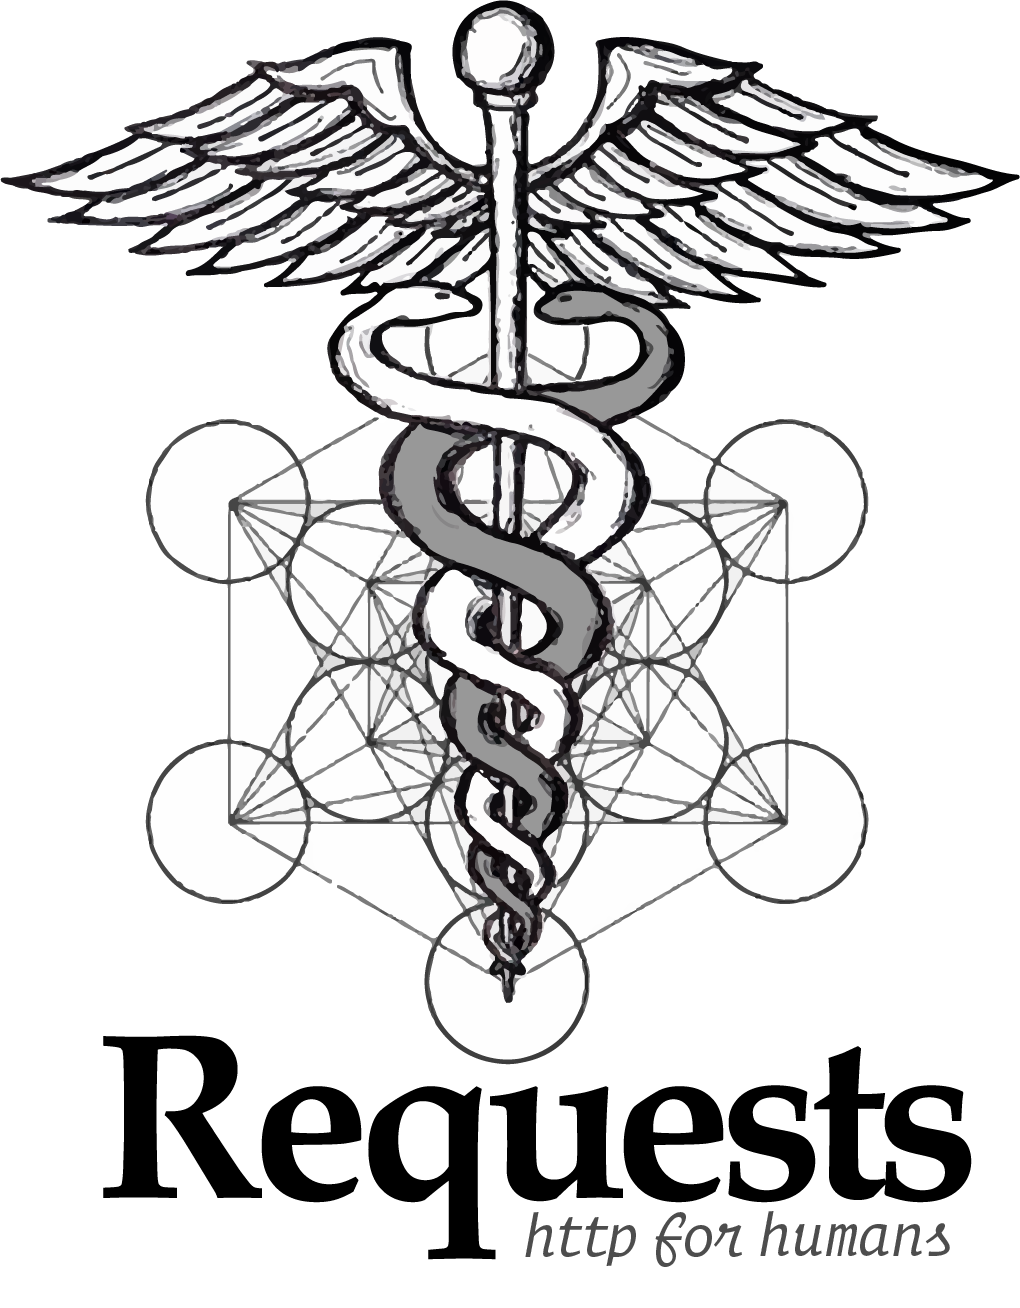
</center></div>

In [257]:
import requests

response = requests.get('http://httpbin.org')

response.status_code

200

In [258]:
response.text[:512]

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n    <meta charset="UTF-8">\n    <title>httpbin.org</title>\n    <link href="https://fonts.googleapis.com/css?family=Open+Sans:400,700|Source+Code+Pro:300,600|Titillium+Web:400,600,700"\n        rel="stylesheet">\n    <link rel="stylesheet" type="text/css" href="/flasgger_static/swagger-ui.css">\n    <link rel="icon" type="image/png" href="/static/favicon.ico" sizes="64x64 32x32 16x16" />\n    <style>\n        html {\n            box-sizing: border-box;\n            overflow: '

## HTML: HyperText Markup Language

<div><center>
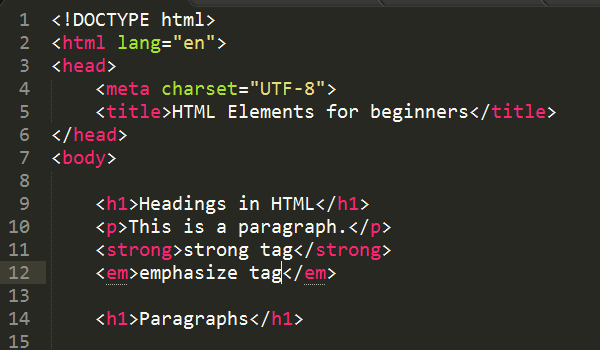
</center></div>

[](https://blogwork.ru/wp-content/uploads/2016/08/blogwork-HTML-tag-p-for-Beginner.png)

<div><center>
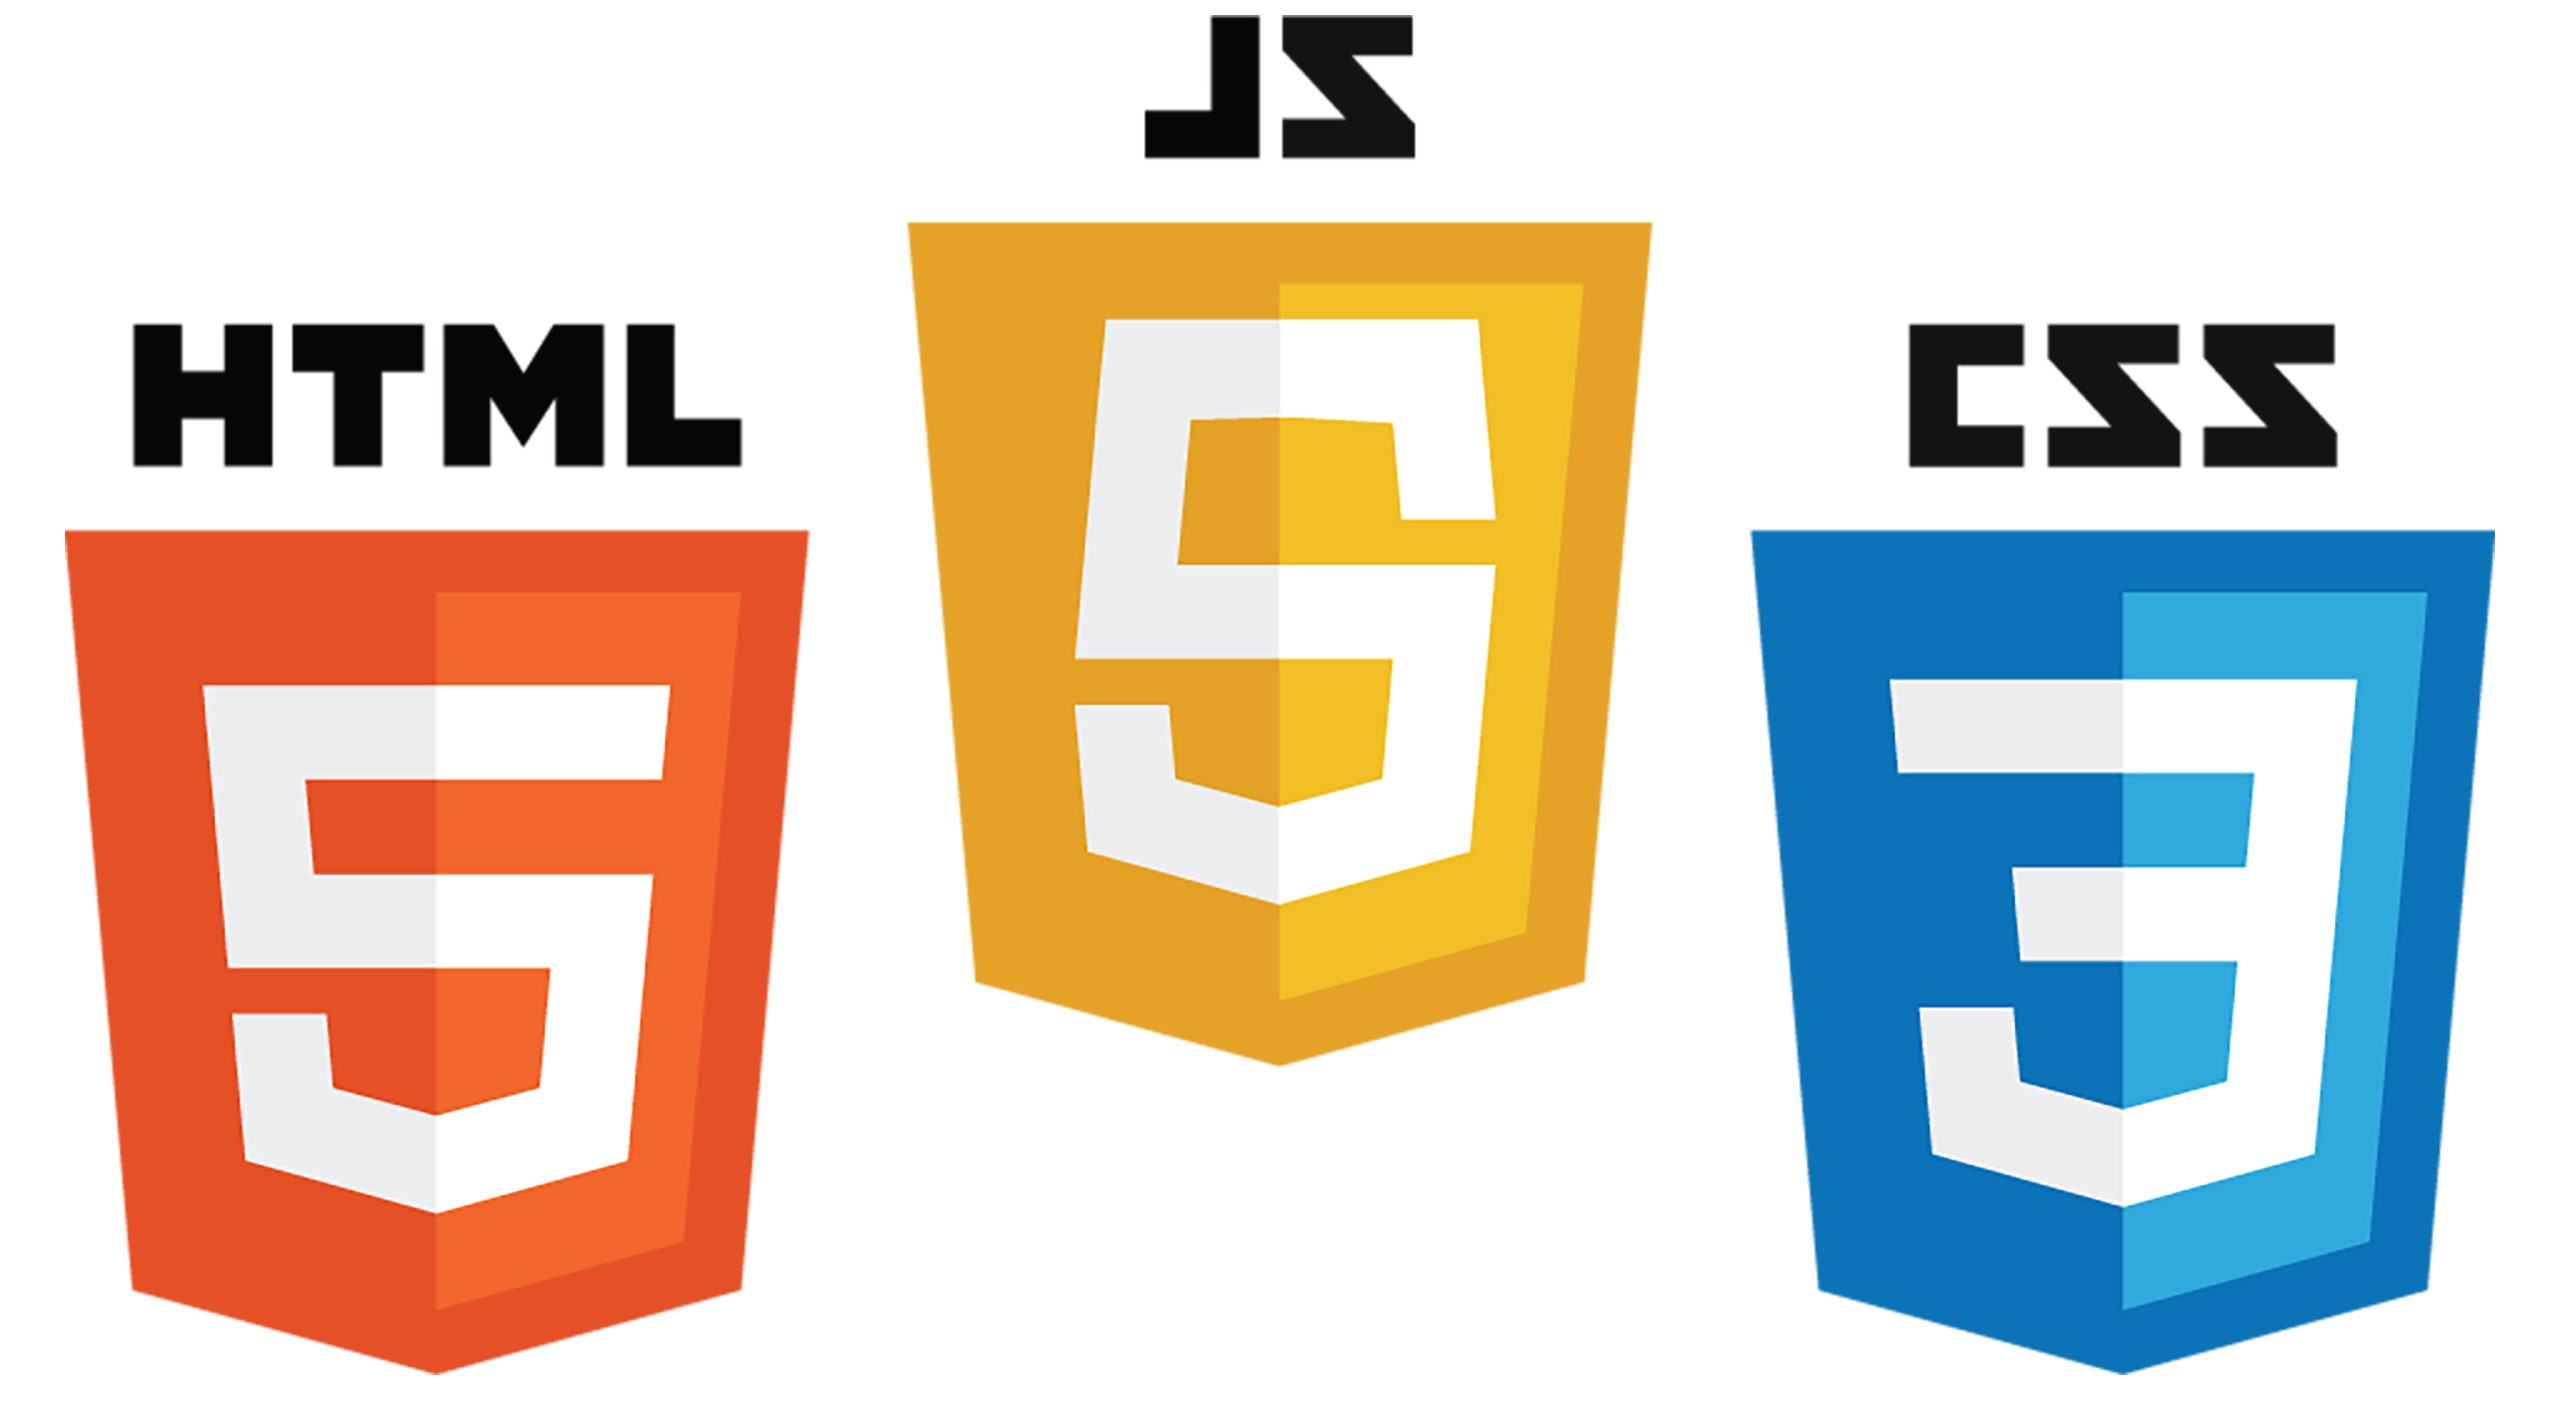
</center></div>

[](https://miro.medium.com/max/3328/1*l4xICbIIYlz1OTymWCoUTw.jpeg)

## Web scraping

In [294]:
from bs4 import BeautifulSoup

In [296]:
html = requests.get('http://example.com', timeout=1).text

In [297]:
soup = BeautifulSoup(html)

In [298]:
css_element = soup.html.head.style
print(css_element)
css_element.clear()

<style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>


In [299]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Example Domain
  </title>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <style type="text/css">
  </style>
 </head>
 <body>
  <div>
   <h1>
    Example Domain
   </h1>
   <p>
    This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.
   </p>
   <p>
    <a href="https://www.iana.org/domains/example">
     More information...
    </a>
   </p>
  </div>
 </body>
</html>



In [155]:
html = soup.html

In [156]:
html.head.title

<title>Example Domain</title>

In [157]:
html.head.findAll('meta')

[<meta charset="utf-8"/>,
 <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>]

In [158]:
paragraphs = html.findAll('p')
paragraphs

[<p>This domain is for use in illustrative examples in documents. You may use this
     domain in literature without prior coordination or asking for permission.</p>,
 <p><a href="https://www.iana.org/domains/example">More information...</a></p>]

In [159]:
links = html.findAll('a')
links

[<a href="https://www.iana.org/domains/example">More information...</a>]

In [160]:
for link in links:
    print(link.text, link['href'])

More information... https://www.iana.org/domains/example


In [301]:
#  https://www.google.ru/search?q=test
SEARCH_URL = 'https://www.google.ru/search'
response = requests.get(SEARCH_URL, params={'q': 'википедия'}, timeout=1)
# requests умеет сам обрабатывать HTTP-ошибки и бросать исключения, если всё плохо
response.raise_for_status()

In [302]:
soup = BeautifulSoup(response.text)  

In [225]:
# парсить сайты - неблагодарное дело
examples = {}
for div in soup.find_all('div'):
    text = div.text
    if (classes := div.attrs.get('class')) is not None:
        for class_ in classes:
            if not 'Википедия — свободная энциклопедия' == text:
                continue
            examples[class_] = div.text.strip()

examples

{'j039Wc': 'Википедия — свободная энциклопедия',
 'BNeawe': 'Википедия — свободная энциклопедия',
 'vvjwJb': 'Википедия — свободная энциклопедия',
 'AP7Wnd': 'Википедия — свободная энциклопедия'}

In [303]:
for elem in soup.find_all('div', attrs={'class': 'j039Wc'}):
    descr = elem.find('div', attrs={'class': 'BNeawe'})
    if not descr:
        continue
    print('-', descr.text)

- Википедия — свободная энциклопедия
- Править - Википедия
- Русская Википедия
- Википедия:Описание
- Википедия:Поиск
- Википедия:Избранные статьи
- Категория:Википедия - Викиновостей
- Википедия — Русский эксперт
- Википедия - Приложения в Google Play


In [317]:
# без указания /html будет версия сайта, которая работает только с JavaScript
SEARCH_URL = 'https://duckduckgo.com/html'

response = requests.get(
    "https://duckduckgo.com/html", params={'q': 'Python language'},
    headers={'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) '
                           'AppleWebKit/537.36 (KHTML, like Gecko) '
                           'Chrome/77.0.3865.121 '
                           'Safari/537.36'}
)
response.raise_for_status()

In [318]:
soup = BeautifulSoup(response.text)

In [319]:
from IPython.display import display, HTML

for link in soup.find_all('a', attrs={"class": "result__a"}):
    display(HTML(str(link)))

In [320]:
for div in soup.find_all('div', attrs={"class": "results_links"}):
    display(HTML(str(div)))

# API: Application Programming Interface

<div><center>
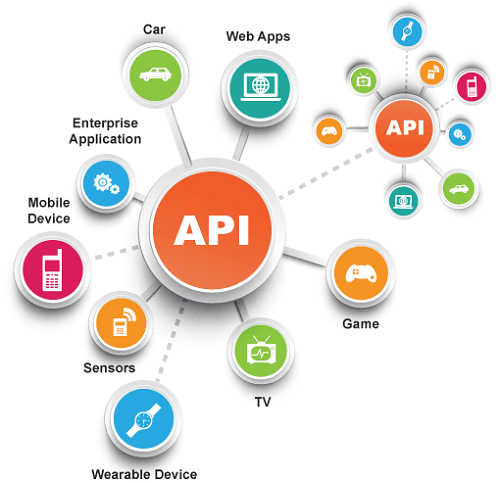
</center></div>

[](http://blog.restcase.com/content/images/2016/11/api-collaboration.png)

## Публичное API

In [244]:
DICTIONARY_API = 'https://dictionary.yandex.net/api/v1/dicservice.json/lookup'
TEMP_KEY = 'dict.1.1.20191119T132629Z.f06d32fa3b4c5e18.922a67da8890eb40fb4a680a7d5d10347f8139b7'

In [245]:
params = {'key': TEMP_KEY, 'lang': 'en-ru', 'text': 'hello'}
response = requests.get(DICTIONARY_API, params=params, timeout=1)
response.raise_for_status()
body = response.text

In [246]:
body

'{"head":{},"def":[{"text":"hello","pos":"noun","ts":"həˈləʊ","tr":[{"text":"привет","pos":"noun","gen":"м","fr":10,"syn":[{"text":"добрый день","pos":"noun","fr":5},{"text":"Здравствуй","pos":"noun","gen":"м","fr":1}],"mean":[{"text":"hi"},{"text":"good afternoon"}],"ex":[{"text":"big hello","tr":[{"text":"большой привет"}]}]},{"text":"приветствие","pos":"noun","gen":"ср","fr":5}]},{"text":"hello","pos":"verb","ts":"həˈləʊ","tr":[{"text":"здравствуйте","pos":"verb","asp":"несов","fr":1,"mean":[{"text":"hi"}]},{"text":"поздороваться","pos":"verb","asp":"сов","fr":5,"mean":[{"text":"greet"}]},{"text":"приветствовать","pos":"verb","asp":"несов","fr":5}]},{"text":"hello","pos":"interjection","ts":"həˈləʊ","tr":[{"text":"АЛЛО","pos":"interjection","fr":10},{"text":"ау","pos":"interjection","fr":1}]},{"text":"hello","pos":"adverb","ts":"həˈləʊ","tr":[{"text":"здорово","pos":"adverb","fr":1,"mean":[{"text":"hey"}]}]}]}'

In [247]:
response.headers['content-type']

'application/json; charset=utf-8'

# JSON: JavaScript Object Notation

<div><center>
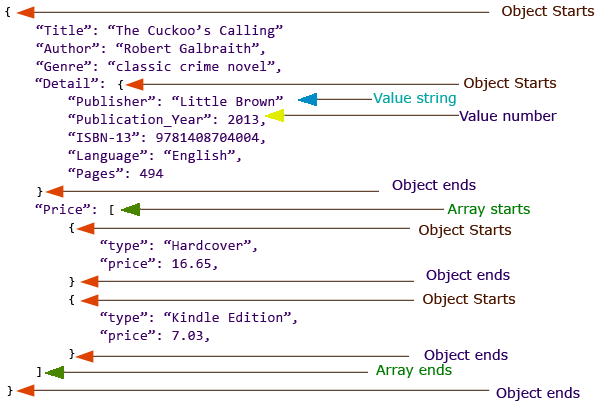
</center></div>

[](https://www.w3resource.com/w3r_images/json-introduction.png)

In [248]:
import json

In [249]:
definition = json.loads(body)['def']  # or response.json()['def']

In [250]:
definition[:2]

[{'text': 'hello',
  'pos': 'noun',
  'ts': 'həˈləʊ',
  'tr': [{'text': 'привет',
    'pos': 'noun',
    'gen': 'м',
    'fr': 10,
    'syn': [{'text': 'добрый день', 'pos': 'noun', 'fr': 5},
     {'text': 'Здравствуй', 'pos': 'noun', 'gen': 'м', 'fr': 1}],
    'mean': [{'text': 'hi'}, {'text': 'good afternoon'}],
    'ex': [{'text': 'big hello', 'tr': [{'text': 'большой привет'}]}]},
   {'text': 'приветствие', 'pos': 'noun', 'gen': 'ср', 'fr': 5}]},
 {'text': 'hello',
  'pos': 'verb',
  'ts': 'həˈləʊ',
  'tr': [{'text': 'здравствуйте',
    'pos': 'verb',
    'asp': 'несов',
    'fr': 1,
    'mean': [{'text': 'hi'}]},
   {'text': 'поздороваться',
    'pos': 'verb',
    'asp': 'сов',
    'fr': 5,
    'mean': [{'text': 'greet'}]},
   {'text': 'приветствовать', 'pos': 'verb', 'asp': 'несов', 'fr': 5}]}]

## API с OAuth авторизацией и python-клиент

In [254]:
class YandexLoginClient:
    """Клиент для доступа к общей информации о профиле в Яндексе"""
    
    def __init__(self, *, base_url="https://login.yandex.ru", token):
        self._base_url = base_url
        self._session = requests.Session()
        self._session.headers['Authorization'] = f'OAuth {token}'
    
    def info(self):
        response = self._session.get(self._base_url + '/info', timeout=3)
        response.raise_for_status()
        return response.json()
    
    def censored_email(self):
        email = self.info()['default_email']
        name, host = email.split('@')
        return name[0] + '*' * (len(name) - 1) + '@' + host

In [255]:
from pathlib import Path
token = (Path.home() / '.PythonWebHTTPApiLecture/token').read_text().strip()
client = YandexLoginClient(token=token)

In [256]:
client.censored_email()

'k******@yandex.ru'

<small>OAuth токен можно полуить тут

https://oauth.yandex.ru/authorize?response_type=token&client_id=4bc448e01f46442883dce6dc3254e44c&device_id=my_device

и положить в ~/.PythonWebHTTPApiLecture/token</small>

# Непубличное API

Любые WEB-приложения для обновления данных внутри себя ходят в какие-то внутренние API своей платформы. При некотором старании можно научиться пользоваться этими API в вашем коде. Впрочем, для непубличного API гарантий никаких – сломаться может в любой момент.

## Аналоги requests
Кроме `requests` есть несколько библиотек с похожим интерфейсом, но дополнительными функциями.
Например `aiohttp` для асинхронных запросов, `httpx` для синхронных и асинхронных, плюс дополнительные удобства.

In [282]:
import httpx

In [283]:
client = httpx.Client(base_url='http://httpbin.org')
client.get('/get').json()

{'args': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-httpx/0.23.0',
  'X-Amzn-Trace-Id': 'Root=1-637ac070-174e7a080b72d0283462ebe7'},
 'origin': '79.139.132.94',
 'url': 'http://httpbin.org/get'}

In [284]:
async_client = httpx.AsyncClient(base_url='http://httpbin.org')
(await async_client.get('/get')).json()

{'args': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-httpx/0.23.0',
  'X-Amzn-Trace-Id': 'Root=1-637ac075-49861b9d510ef40722092fa1'},
 'origin': '79.139.132.94',
 'url': 'http://httpbin.org/get'}

<div><center>

</center></div>